In [ ]:
# Aykiri Gozlem Genel Tanim: Veride genel egilimin oldukca disina cikan ya da diger gozlemlerden oldukca farkli olan gozlemlere aykiri gozlem denir.
# Aykiri Deger(Outliner): Aykiriligi ifade eden numerik degere denir.
# Aykiri gozlem: Aykiri degeri barindiran gozlem birimine denir.
# Aykiri Deger Neye Sebep olur?: Genellenebilirlik kaygisi ile olusturulan kural setlerini ya da fonkisyonlari yaniltir. Yanliliga sebep olur.

56.0
59.0
3.0
alt_sinir:  51.5
ust_sinir:  63.5
0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool


1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

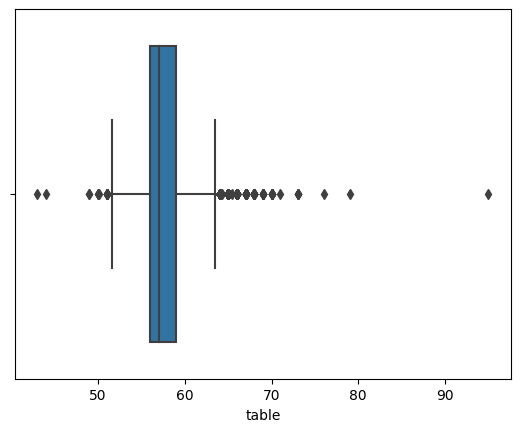

In [17]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include=['float64', 'int64'])
df = df.dropna()
df.head()
df_table = df['table']
df_table.head()
sns.boxplot(x = df_table)
# Esik deger belirleme
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)
# Esik deger hesaplama
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3+ 1.5*IQR
print('alt_sinir: ', alt_sinir)
print('ust_sinir: ', ust_sinir)
# Aykiri deger sorgulama
(df_table < alt_sinir) | (df_table > ust_sinir)
aykiri_tf = (df_table < alt_sinir)
print(aykiri_tf.head())
df_table[aykiri_tf]

In [32]:
# Aykiri Deger Problemini Cozmek
# Silme Yaklasimi
import pandas as pd
type(df_table)
df_table = pd.DataFrame(df_table)
print(df_table.shape)
t_df = df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis=1)]
print(t_df)
t_df.shape

(53940, 1)
       table
0       55.0
1       61.0
3       58.0
4       58.0
5       57.0
...      ...
53935   57.0
53936   55.0
53937   60.0
53938   58.0
53939   55.0

[53335 rows x 1 columns]


(53335, 1)

In [41]:
# Ortalama ile Doldurma
#print(df_table.head())
#print(aykiri_tf.head())
df_table[aykiri_tf]
df_table.mean()
df_table[aykiri_tf] = df.table.mean()
df_table[aykiri_tf]


,table
1515,57.457184
3238,57.457184
3979,57.457184
4150,57.457184
5979,57.457184
7418,57.457184
8853,57.457184
11368,57.457184
22701,57.457184
25179,57.457184


In [50]:
# Baskilama Yontemi
df_table = df['table']
df_table[aykiri_tf] = alt_sinir
print(df_table[aykiri_tf])



1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64


C:\Users\fatih\AppData\Local\Temp\ipykernel_12364\727879106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = alt_sinir


In [67]:
# Cok degerli degiskenli aykiri gozlem analizi
# Local Outlier Factor :Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.
# Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor.
# Eğer bir nokta komşularınının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor.
# Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
diamonds = diamonds.select_dtypes(include = ['float64', 'int64']) 
df = diamonds.copy()
df = df.dropna()
df.head()
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors= 20, contamination= 0.1)
clf.fit_predict(df)
df_scores = clf.negative_outlier_factor_
print(df_scores[0:10])
print(np.sort(df_scores)[0:20])
esik_deger = np.sort(df_scores)[13]
aykiri_tf = df_scores > esik_deger
print(aykiri_tf)
# aykiri olmayan degerler # silme islemi
yeni_df = df[df_scores > esik_deger]
print(yeni_df)
# aykiri degerler
df[df_scores < esik_deger]



[-1.58352526 -1.59732899 -1.62278873 -1.33002541 -1.30712521 -1.28408436
 -1.28428162 -1.26458706 -1.28422952 -1.27351342]
[-8.60430658 -8.20889984 -5.86084355 -4.98415175 -4.81502092 -4.81502092
 -4.61522833 -4.37081214 -4.29842288 -4.10492387 -4.0566648  -4.01831733
 -3.94882806 -3.82378797 -3.80135297 -3.75680919 -3.65947378 -3.59249261
 -3.55564138 -3.47157375]
[ True  True  True ...  True  True  True]
       carat  depth  table  price     x     y     z
0       0.23   61.5   55.0    326  3.95  3.98  2.43
1       0.21   59.8   61.0    326  3.89  3.84  2.31
2       0.23   56.9   65.0    327  4.05  4.07  2.31
3       0.29   62.4   58.0    334  4.20  4.23  2.63
4       0.31   63.3   58.0    335  4.34  4.35  2.75
...      ...    ...    ...    ...   ...   ...   ...
53935   0.72   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75   62.

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [75]:
# Baskilama
df[df_scores == esik_deger]
baski_deger = df[df_scores == esik_deger]
aykirilar = df[~aykiri_tf]
res = aykirilar.to_records(index=False)
res[:] = baski_deger.to_records(index=False)
print(res)
import pandas as pd
df[~aykiri_tf] = pd.DataFrame(res, index=df[~aykiri_tf].index)
print(df[~aykiri_tf])


[(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)]
       carat  depth  table  price     x    y     z
6341    0.45   68.6   57.0    756  4.73  4.5  3.19
10377   0.45   68.6   57.0    756  4.73  4.5  3.19
24067   0.45   68.6   57.0    756  4.73  4.5  3.19
31230   0.45   68.6   57.0    756  4.73  4.5  3.19
35633   0.45   68.6   57.0    756  4.73  4.5  3.19
36503   0.45   68.6   57.0    756  4.73  4.5  3.19
38840   0.45   68.6   57.0    756  4.73  4.5  3.19
41918   0.45   68

In [ ]:
# Eksik Gozlem Analizi
# Eksik Veri Nedir?: incelenen veri setindeki gozlemlerde eksiklik olmasi durumunu ifade eder.
# 1. Veri setindeki eksikligi yapisal bir eksiklik olup olmadiginin bilinmesi gerekir.
# 2. NA her zaman eksiklik anlamina gelmez.
# Tumuyle Raslantisal Kayip: Diger degiskenlerden ya da yapisal bir problemden kaynaklanmayan tamamen rastgele olusan gozlemler.
# Raslantisal Kayip: Diger degiskenlere bagli olarak olusabilen eksiklik turu.
# Raslantisal Olmayan Kayip: Goz ardi edilemeyecek olan ve yapisal problemler ile ortaya cikan eksiklik turu.
# Gorsel Teknikler, Bagimsiz Iki Orneklem T Testi, Korelasyon Testi, Little'nin MCAR Testi
# Silme Yontemleri: Gozlem ya da degisken silme yontemi, Liste bazinda silme yontemi(Listwise Method), Ciftler bazinda silme yontemi(Pairwise Method)
# Deger atama yontemleri: (ortanca, ortalama, medyan), en benzer birime atama(hot deck), dis kaynakli atama
# Tahmine dayali yontemler: makine ogrenmesi, em, coklu atama yontemi


In [103]:
# Eksik Veri Analizi
# Hizli Cozum
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [104]:
print(df.isnull().sum())
print(df.notnull().sum())
print(df.isnull().sum().sum())
print(df.isnull())
print(df[df.isnull().any(axis=1)])
print(df[df.notnull().all(axis=1)])
print(df[df['V1'].notnull() & df['V2'].notnull() & df['V3'].notnull()])

V1    2
V2    3
V3    2
dtype: int64
V1    7
V2    6
V3    7
dtype: int64
7
      V1     V2     V3
0  False  False   True
1  False   True  False
2  False  False  False
3   True  False  False
4  False  False  False
5  False   True  False
6   True   True   True
7  False  False  False
8  False  False  False
    V1   V2    V3
0  1.0  7.0   NaN
1  3.0  NaN  12.0
3  NaN  8.0   6.0
5  1.0  NaN   7.0
6  NaN  NaN   NaN
     V1    V2    V3
2   6.0   5.0   5.0
4   7.0  12.0  14.0
7   9.0   2.0   2.0
8  15.0   3.0  31.0
     V1    V2    V3
2   6.0   5.0   5.0
4   7.0  12.0  14.0
7   9.0   2.0   2.0
8  15.0   3.0  31.0


In [102]:
# eksik degerlerin direkt silinmesi
#df.dropna()
df
# basit deger atama
df['V1'].mean()
df['V1'].fillna(df['V1'].mean())
df['V2'].fillna(0)

0     7.0
1     0.0
2     5.0
3     8.0
4    12.0
5     0.0
6     0.0
7     2.0
8     3.0
Name: V2, dtype: float64

In [105]:
df.apply(lambda x: x.fillna(x.mean()), axis=0 )

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0
